<a href="https://colab.research.google.com/github/mantoan-thi/Machine_learning_na_B3/blob/main/Prevendo_Pre%C3%A7o_de_A%C3%A7%C3%B5es_com_Deep_Learning_(LSTM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from talib.abstract import *
%matplotlib inline

In [ ]:
Stock = pd.DataFrame(yf.Ticker('ITUB4.SA').history(period = '2y'))
Stock['M21'] = Stock['Close'].rolling(14).mean()
Stock['Dvp'] = Stock['M21'].rolling(7).std()

In [ ]:
Stock['ho'] = Stock['High'] - Stock['Open'] # distance between Highest and Opening price
Stock['lo'] = Stock['Low'] - Stock['Open'] # distance between Lowest and Opening price
Stock['Dvp_lo'] = Stock['lo'].rolling(7).std()
Stock['Dvp_ho'] = Stock['ho'].rolling(7).std()
Stock['Gain'] = Stock['Close'].pct_change()

<AxesSubplot:xlabel='Date'>

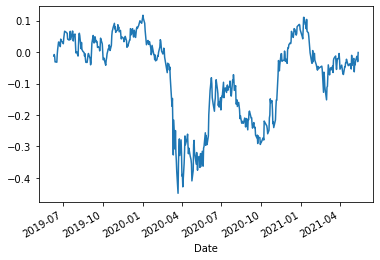

In [ ]:
Stock['New_Gain_Acum'] = Stock['Gain'].cumsum()
Stock['New_Gain_Acum'].plot()

In [ ]:
Stock['Dir'] = np.where(Stock['Close'] > Stock['Open'],1,-1)
Stock['Dir'] = Stock['Dir'].shift(-1)
Stock.dropna(inplace=True)
Stock.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,M21,Dvp,ho,lo,Dvp_lo,Dvp_ho,Gain,Dir
Date,,,,,,,,,,,,,,,
2019-06-10,32.859774,32.878632,32.162036,32.652340,18283400,0.0,0,32.389228,0.416874,0.018858,-0.697738,0.258444,0.192319,-0.012546,-1.0
2019-06-11,32.859781,32.982358,32.284620,32.812637,29136500,0.0,0,32.471018,0.364207,0.122577,-0.575161,0.232494,0.149552,0.004909,-1.0
2019-06-12,32.812629,33.114354,32.501477,32.624050,17637000,0.0,0,32.544050,0.305217,0.301725,-0.311152,0.240391,0.157816,-0.005747,-1.0
2019-06-13,32.576907,32.605196,31.784878,32.039459,36877200,0.0,0,32.608986,0.244652,0.028289,-0.792029,0.270864,0.165604,-0.017919,1.0
2019-06-14,31.964029,32.124319,31.568012,32.048889,18775100,0.0,0,32.666516,0.184717,0.160290,-0.396016,0.245272,0.159351,0.000294,1.0


In [ ]:
y = np.array(Stock[['Dir']])
X = Stock.drop(['Dir','Gain','Dividends','Stock Splits'],axis=1)

In [ ]:
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)

In [ ]:
h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA","DecisionTree",
         'LogisticRegression']
classifiers = [
    KNeighborsClassifier(5),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=2),
    RandomForestClassifier(max_depth=2, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    DecisionTreeClassifier(random_state=0),
    LogisticRegression(max_iter=10,random_state=0,solver = 'liblinear')]

In [ ]:
# iterate over classifiers
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    pred = clf.predict(X_test)
    print('Modelo:', name,' // Score: {0:0.2%}'.format(score))
    #print('Report:',classification_report(y_test,pred))
    #print('\nConfusion:',confusion_matrix(y_test,pred))

<ipython-input-496-b825ae128603>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  clf.fit(X_train, y_train)
C:\Users\Thiago\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Thiago\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Thiago\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Modelo: Nearest Neighbors  // Score: 50.96%
Modelo: Linear SVM  // Score: 56.69%
Modelo: RBF SVM  // Score: 56.05%
Modelo: Gaussian Process  // Score: 57.32%
Modelo: Decision Tree  // Score: 58.60%
Modelo: Random Forest  // Score: 59.24%


<ipython-input-496-b825ae128603>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
C:\Users\Thiago\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Modelo: Neural Net  // Score: 59.24%
Modelo: AdaBoost  // Score: 53.50%
Modelo: Naive Bayes  // Score: 56.05%


C:\Users\Thiago\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Thiago\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Modelo: QDA  // Score: 53.50%
Modelo: DecisionTree  // Score: 48.41%
Modelo: LogisticRegression  // Score: 57.96%


C:\Users\Thiago\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Thiago\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Thiago\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [ ]:
Stock['Gain_acum'] = Stock['Gain']*1000

In [ ]:
Dt = LogisticRegression(max_iter=10,random_state=0,solver = 'liblinear')
Dt.fit(X_train, y_train)
score = Dt.score(X_test, y_test)
pred = Dt.predict(X_test)
print('Modelo:', name,' // Score: {0:0.2%}'.format(score))

Modelo: LogisticRegression  // Score: 57.96%


C:\Users\Thiago\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [ ]:
pred = rf.predict(X)

In [ ]:
dados = pd.DataFrame()
dados['Dir'] = Stock['Dir']
dados['Dir_previsto'] = pred
dados['Gain_acum'] = Stock['Gain_acum'].abs()
dados['Close'] = Stock['Close']

In [ ]:
dados['Ckeck'] = np.where(dados['Dir'] == dados['Dir_previsto'],1,-1)

In [ ]:
dados['Ckeck'] = dados['Ckeck'].shift()
dados.dropna(inplace=True)

In [ ]:
dados.head()

,Dir,Dir_previsto,Gain_acum,Close,Ckeck
Date,,,,,
2019-06-12,-1.0,-1.0,5.747395,32.624050,1.0
2019-06-13,1.0,-1.0,17.919017,32.039459,1.0
2019-06-14,1.0,-1.0,0.294322,32.048889,1.0
2019-06-17,1.0,1.0,1.177062,32.011166,-1.0
2019-06-18,1.0,-1.0,25.920645,32.840916,-1.0


In [ ]:
dados['Saldo'] = dados['Ckeck'] * dados['Gain_acum']
dados

,Dir,Dir_previsto,Gain_acum,Close,Ckeck,Saldo
Date,,,,,,
2019-06-12,-1.0,-1.0,5.747395,32.624050,1.0,5.747395
2019-06-13,1.0,-1.0,17.919017,32.039459,1.0,17.919017
2019-06-14,1.0,-1.0,0.294322,32.048889,1.0,0.294322
2019-06-17,1.0,1.0,1.177062,32.011166,-1.0,-1.177062
2019-06-18,1.0,-1.0,25.920645,32.840916,-1.0,-25.920645
...,...,...,...,...,...,...
2021-05-07,1.0,-1.0,12.087910,27.629999,1.0,12.087910
2021-05-10,1.0,-1.0,14.839007,28.040001,-1.0,-14.839007
2021-05-11,-1.0,-1.0,2.139849,27.980000,-1.0,-2.139849


In [ ]:
dados['Saldo_acum'] = dados['Saldo'].cumsum()

<AxesSubplot:xlabel='Date'>

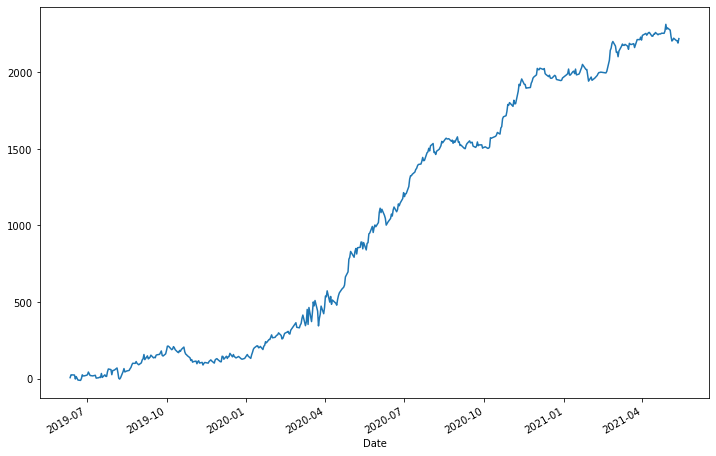

In [ ]:
dados['Saldo_acum'].plot(figsize=(12,8))